### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [262]:
# Importing all the necessary libraries for both panda and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Importing stats package for ttest
from scipy.stats import ttest_ind

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [264]:
# Read the file
data = pd.read_csv('data/coupons.csv')
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [265]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [267]:
# Summary :Identified several columns have missing data

missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


In [268]:
# Understand the type of passanger types - Needed further down the problem 
data.passanger.value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Rows and Columns before finalizzing missing data (12684, 26)
Duplicate number of rows 74
Rows and Columns after  finalizzing missing data (12610, 25)
destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
direction_opp           0
occupation              0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
education               0
Y                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                ------

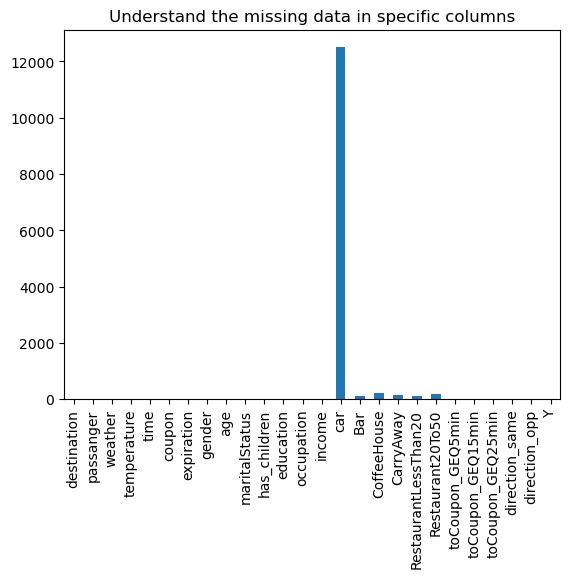

In [270]:
# Check the shape of the table before
print(f"Rows and Columns before finalizzing missing data {data.shape}")

print(f"Duplicate number of rows {data.duplicated().sum()}")

# Drop the duplicate rowns
data.drop_duplicates(inplace=True)

data.isna().sum().plot(kind='bar')
plt.title('Understand the missing data in specific columns')
plt.savefig('images/missingdata.png')


# Assuming that any NaN in Carryway means "less than 1" times people have ordered carry away
data['CarryAway'] = data['CarryAway'].fillna("less1")

# Cleaning up the values in Marital Status for easier processing later
data['maritalStatus']= data['maritalStatus'].str.replace('partner', ' ', regex=False)

#Number of times that he/she goes to a coffee house: for NaN assumes as less than 1
data['CoffeeHouse'] = data['CoffeeHouse'].fillna("less1")

#Number of times that he/she eats at a restaurant with average expense less than $20 per person: It is possible to have 0/never. Assuming never
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna("never")

#Number of times that he/she eats at a restaurant with average expense between $20 to 50 per person: Assuming less than 1
data['Restaurant20To50'] = data['Restaurant20To50'].fillna("less1")

#Number of times that he/she goes to a bar: Assuming never
data['Bar'] = data['Bar'].fillna("never")

#Car column doesn't contain enough data so dropping the column
data = data.drop('car', axis=1)

print(f"Rows and Columns after  finalizzing missing data {data.shape}")


data['coupon'].value_counts()

missing_counts = data.isnull().sum().sort_values()

# Check the values after the clean-up
print(missing_counts)
data.info()

4. What proportion of the total observations chose to accept the coupon?



In [272]:
acceptance_rate = data['Y'].mean()
print(f"The proportion of observations that accepted the coupon is: {acceptance_rate}")
#data['Y'].value_counts()

The proportion of observations that accepted the coupon is: 0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

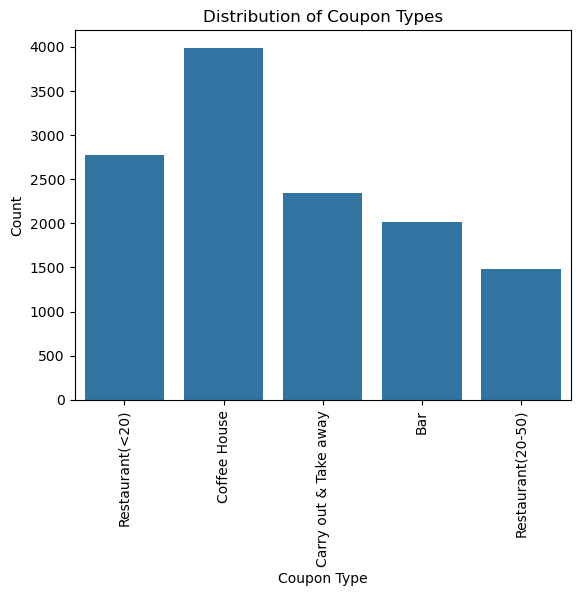

In [274]:
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.savefig('images/coupon-distribution.png')
plt.show()


6. Use a histogram to visualize the temperature column.

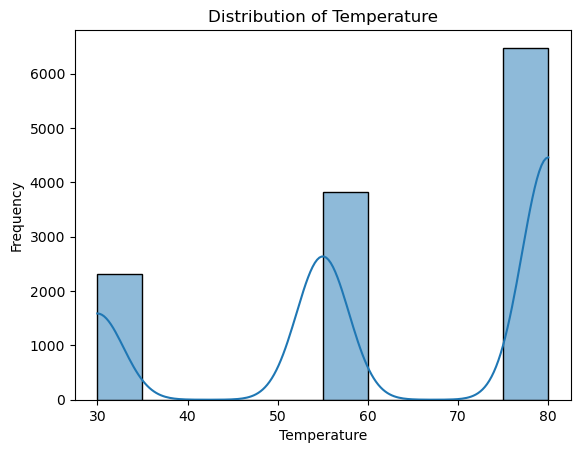

In [276]:

sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.savefig('images/temp-distribution.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [278]:
df_bar=' '
df_bar=data.query('coupon == "Bar"')
print (type(df_bar))
df_bar.head(5)

<class 'pandas.core.frame.DataFrame'>


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried,...,never,less1,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried,...,never,less1,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried,...,never,less1,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [280]:
bar_acceptance_rate = df_bar['Y'].mean()
print(f"The proportion of that accepted the bar coupon is: {bar_acceptance_rate}")

The proportion of that accepted the bar coupon is: 0.4099502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar
1~3      0.621151
4~8      0.635854
gt8      0.577586
less1    0.563118
never    0.530937
Name: Y, dtype: float64


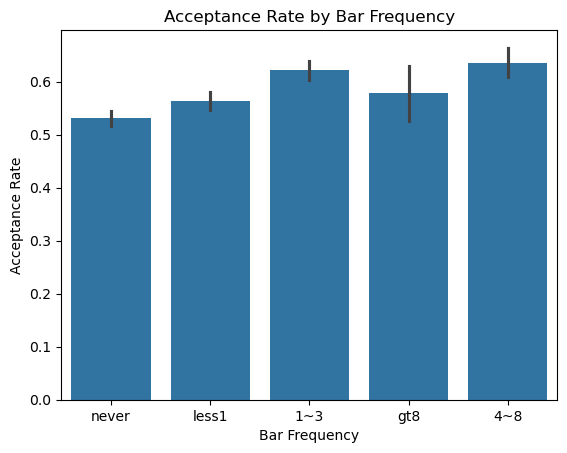

In [317]:

print(data.groupby('Bar')['Y'].mean())

#plot the above acceptance rate
#plt.figure(figsize=(10, 6))
sns.barplot(x='Bar', y='Y', data=data)
plt.title('Acceptance Rate by Bar Frequency')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')

plt.savefig('images/bar-acceptance.png')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [284]:

# Create a new column indicating whether a driver meets the criteria
data['bar_over_25'] = ((data['Bar'] != 'never') & (data['age'] > "25"))

# Calculate the acceptance rate for drivers who meet the criteria
acceptance_rate_bar_over_25 = data.loc[data['bar_over_25'], 'Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = data.loc[~data['bar_over_25'], 'Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_bar_over_25}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others}")

##perform independent two sample t-test
ttest_ind(data['bar_over_25'], ~data['bar_over_25'])
#Since the p-value is greater than .05, we accept the null hypothesis of the t-test and there is a statis


if acceptance_rate_bar_over_25 > acceptance_rate_others:
  print("There appears to be a higher acceptance rate for drivers who go to a bar more than once a month and are over 25.")
elif acceptance_rate_bar_over_25 < acceptance_rate_others:
  print("There appears to be a lower acceptance rate for drivers who go to a bar more than once a month and are over 25.")
else:
  print("There does not appear to be a significant difference in acceptance rate between the two groups.")


Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.5867365377665341
Acceptance rate for all other drivers: 0.5525720746184285
There appears to be a higher acceptance rate for drivers who go to a bar more than once a month and are over 25.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [286]:
#acceptance rate of drivers who go to bars more than once a month and passengers that were not a kid

data['bar_not_kid'] = ((data['Bar'] != 'never') & (data['passanger'] != 'Kid(s)'))

#acceptance rate of drivers who go to bars more than once a month and occupants other than farming, fishing and forestry
data['bar_not_farming_fishing_forestry'] = ((data['Bar'] != 'never') & (data['occupation'] != 'farming') & (data['occupation'] != 'fishing') & (data['occupation'] != 'forestry'))

acc_rate_bar_not_kid = data.loc[data['bar_not_kid'], 'Y'].mean()
acc_rate_bar_not_farming_fishing_forestry = data.loc[data['bar_not_farming_fishing_forestry'], 'Y'].mean()

#data.head(10)
#data.Bar.value_counts()

#data.Bar.value_counts()


print(f"Acceptance rate of drivers who go to bars more than once a month and passengers that were not a kid : {acc_rate_bar_not_kid}")

print(f"Acceptance rate of drivers who go to bars more than once a month and  occupations other than farming, fishing, or forestry. : {acc_rate_bar_not_farming_fishing_forestry}")





Acceptance rate of drivers who go to bars more than once a month and passengers that were not a kid : 0.5977547747485056
Acceptance rate of drivers who go to bars more than once a month and  occupations other than farming, fishing, or forestry. : 0.5939931740614335


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [288]:
data['bar_not_kid'] = ((data['Bar'] != 'never') & (data['Bar'] != 'less1') & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'widowed'))
data['bar_not_kid_un_30'] = ((data['Bar'] != 'never') &  (data['Bar'] != 'less1') & (data['age'] < '30') )
data['income_less_50k'] = data['income'].apply(lambda x: True if x in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'] else False)
data['cheap_resturents_more_than_4'] = data['RestaurantLessThan20'].apply(lambda x: True if x in ['gt8', '4~8'] else False)

data['cheap_and_less_50K'] = ((data['cheap_resturents_more_than_4'] == True)  & (data['income_less_50k'] == True)  )

#data.cheap_resturents_more_than_4.value_counts()
#data.cheap_and_less_50K.value_counts()

acc_rate_bar_not_kid = data.loc[data['bar_not_kid'], 'Y'].mean()
acc_rate_bar_not_kid_un_30 = data.loc[data['bar_not_kid'], 'Y'].mean()
acc_rate_income_less_50k = data.loc[data['cheap_and_less_50K'], 'Y'].mean()


print(f"Acceptance rate of drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed  : {acc_rate_bar_not_kid}")
print(f"Acceptance rate of drivers go to bars more than once a month and are under the age of 30  : {acc_rate_bar_not_kid_un_30 }")
print(f"Acceptance rate of drivers go to cheap restaurants more than 4 times a month and income is less than 50K.: {acc_rate_income_less_50k}")

#income is less than 50K.
#data.income.value_counts()
#data.head(10)

Acceptance rate of drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed  : 0.6222523744911804
Acceptance rate of drivers go to bars more than once a month and are under the age of 30  : 0.6222523744911804
Acceptance rate of drivers go to cheap restaurants more than 4 times a month and income is less than 50K.: 0.6002644336712208


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

 Based on the observations, we can hypothesize that drivers who accepted the bar coupons:

1. Are more likely to frequent bars: Those who go to bars more frequently (more than once a month) tend to have a higher acceptance rate for bar coupons.
2. Are more likely to be older and have a certain occupation (e.g., not farming, fishing, or forestry): Acceptance rate was higher in drivers who go to a bar more than once a month and are over 25
3. 3. May have different passenger criteria

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Following questions to be answred
1.  Understand what time is best to target the coupon based on the usage
2.  Understand what verticle to target based on the usage
3.  Understand who is the real consumer to target

Understand overall count by Hour
hour
18    3220
7     3114
10    2271
14    2006
22    1999
Name: count, dtype: int64


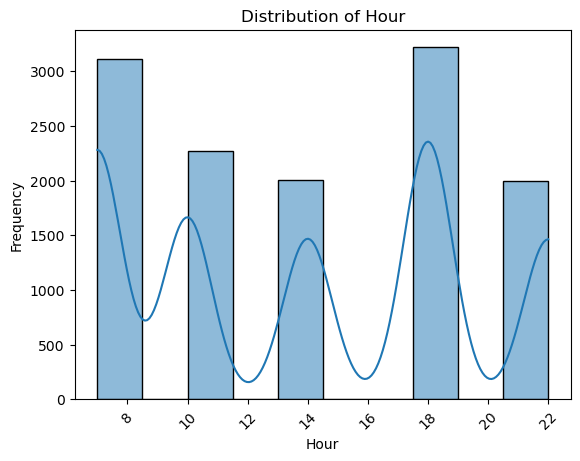

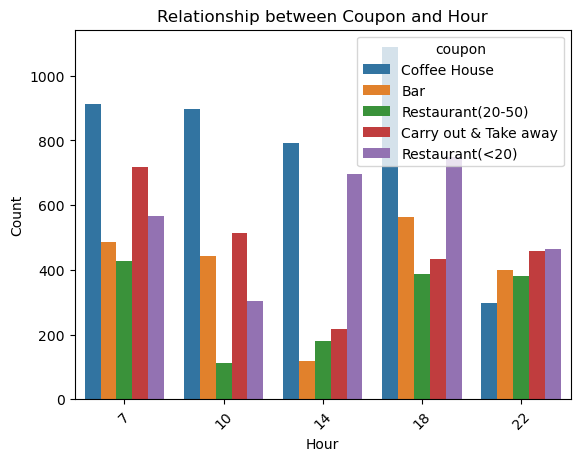

In [292]:

# Understand what time is best to target the coupon based on the usage
# Understand what verticle to target based on the usage
# convert time column into 24hr format
data['hour'] = data['time'].str.replace('AM', ' AM').str.replace('PM', ' PM')
data['hour']=pd.to_datetime(data['hour'], format='%I %p').dt.hour

print("Understand overall count by Hour")
print(data['hour'].value_counts())


#plot histogram of hour
sns.histplot(data['hour'], bins=10, kde=True)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
#slant the x lables 45 degrees
plt.xticks(rotation=45)

plt.savefig('images/hour-distribution.png')
plt.show()
#plot relationship between coupon and hour
sns.countplot(x='hour', hue='coupon', data=data)
plt.title('Relationship between Coupon and Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.savefig('images/relation-coupon-hour.png')
plt.show()


### Summary
8AM in the morning and 18PM in the evening has maximum coupon distribution
Mpst of the time, Coffee houst and cheap resturent (<20) uses most number of coupons

Understand coupon usage by different distribution/vertical
coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64


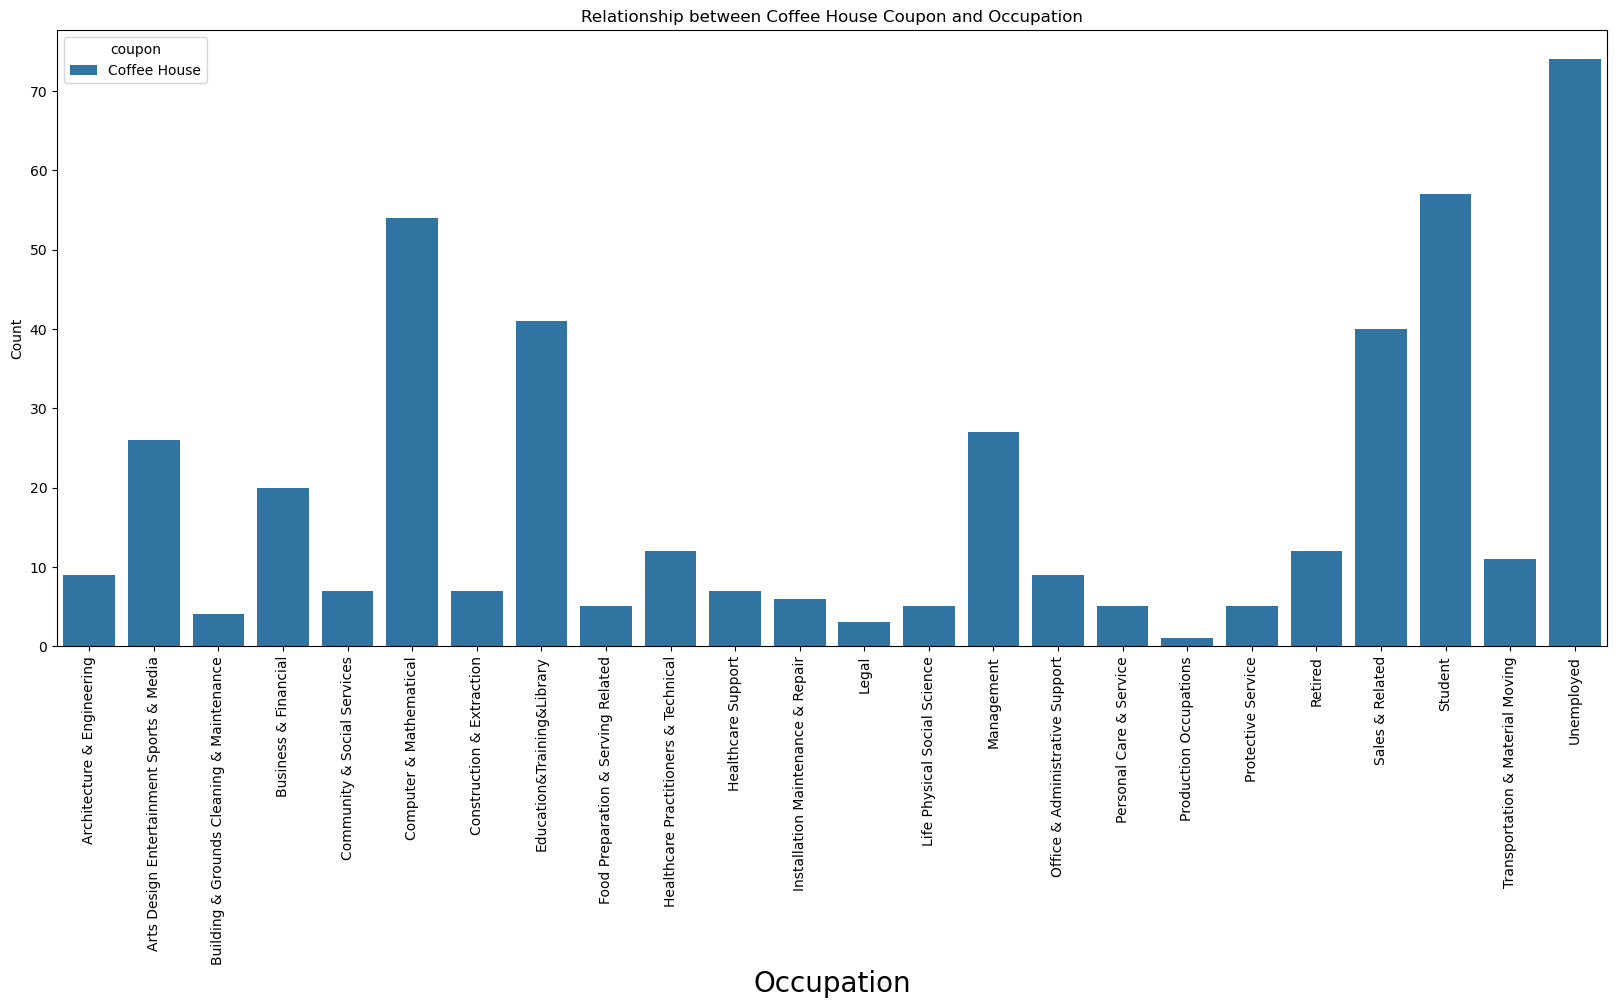

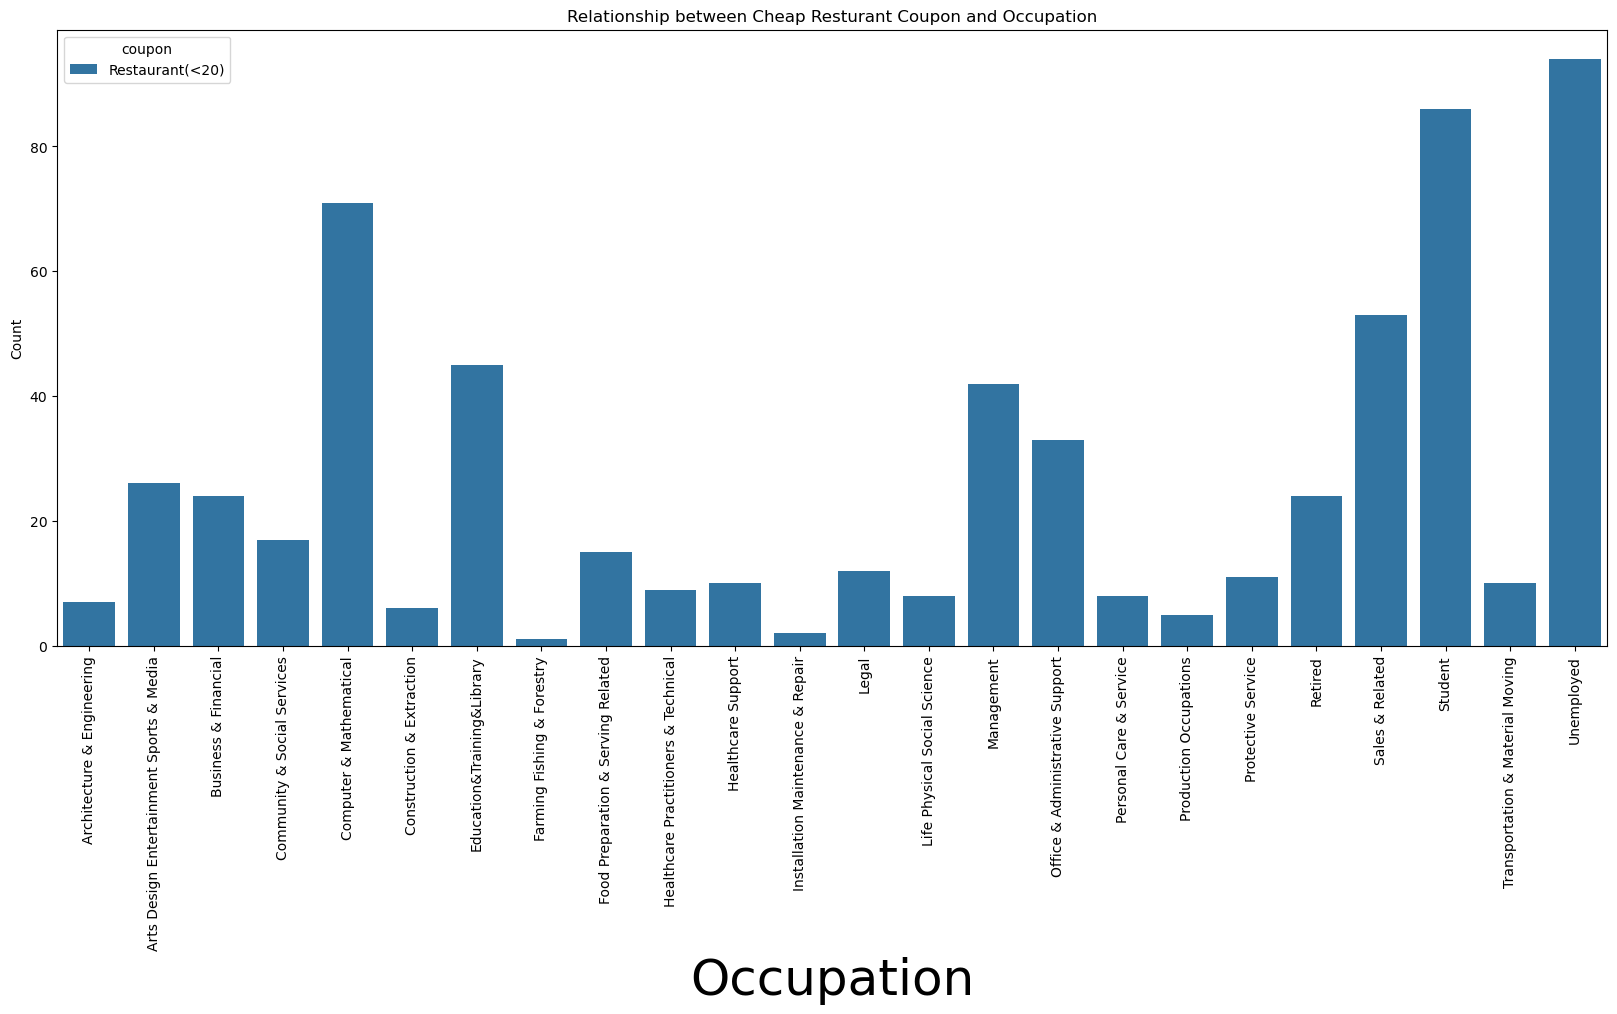

In [294]:
print("Understand coupon usage by different distribution/vertical")
print(data['coupon'].value_counts())


# plot which occupation people use the coupon at 8AM and 18PM for both cheap resturent and coffe shops
plot_data=data.query('hour == 8 or hour == 18 & Y == 1 & coupon == "Coffee House"').sort_values(by='occupation', ascending=True)

plt.figure(figsize=(20, 8))
plt.xlabel('Occupation', fontsize='20')
plt.ylabel('Count')
plt.title('Relationship between Coffee House Coupon and Occupation')
plt.xticks(rotation=90)
sns.countplot(x='occupation', hue='coupon', data=plot_data)

plt.savefig('images/relation-coffee-coupon.png')
plt.show()

plot_data_2=data.query('hour == 8 or hour == 18 & Y == 1 & coupon == "Restaurant(<20)"').sort_values(by='occupation', ascending=True)
plt.figure(figsize=(20, 8))
plt.xlabel('Occupation', fontsize=36)
plt.ylabel('Count')
plt.title('Relationship between Cheap Resturant Coupon and Occupation')
plt.xticks(rotation=90)
sns.countplot(x='occupation', hue='coupon', data=plot_data_2)

plt.savefig('images/relation-coupon-cheapresturent.png')
plt.show()

### Summary
For hour == 8 or hour == 18, professions who use Coffee House coupon are Unemployed, Students and computer & math professionals
For hour == 8 or hour == 18, professions who use cheap resturent coupon are Unemployed, Students and computer & math professionals



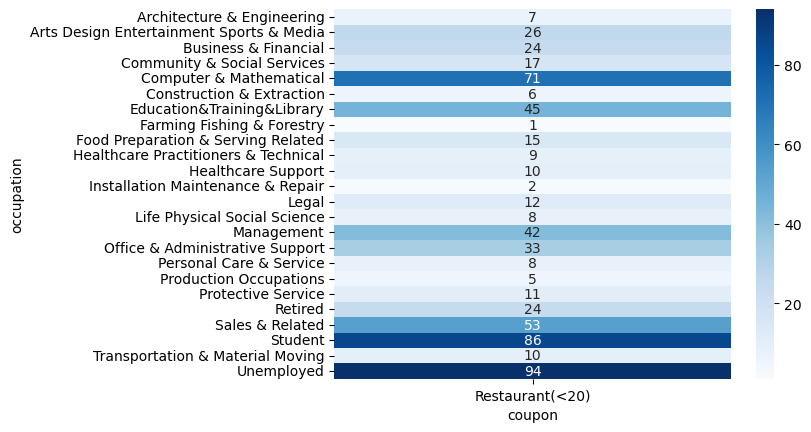

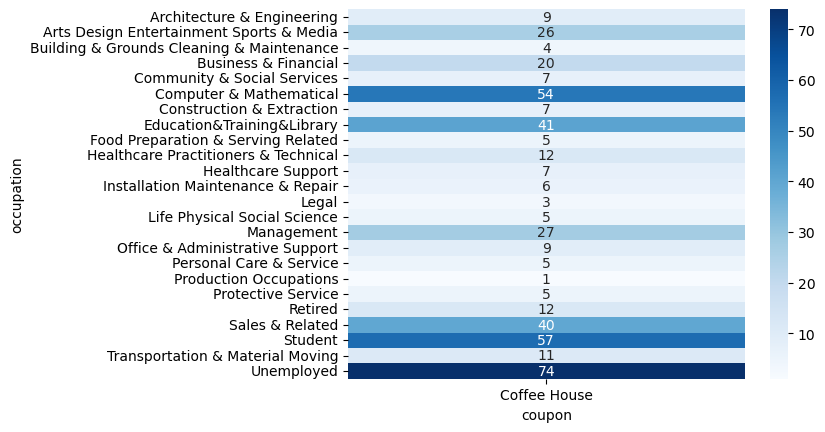

In [296]:

#show the heatmap in sorting order for the above
sns.heatmap(plot_data_2.pivot_table(index='occupation', columns='coupon', aggfunc='size', fill_value=0), annot=True, cmap='Blues')

plt.savefig('images/coupon-cheaprest.png')
plt.show()
sns.heatmap(plot_data.pivot_table(index='occupation', columns='coupon', aggfunc='size', fill_value=0), annot=True, cmap='Blues')

plt.savefig('images/coupon-coffee.png')
plt.show()

### Summary ( Same as above but different format for visualization )
For hour == 8 or hour == 18, professions who use Coffee House coupon are Unemployed, Students and computer & math professionals
For hour == 8 or hour == 18, professions who use cheap resturent coupon are Unemployed, Students and computer & math professionals

